In [31]:
import torch
import torch as nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu118'

#DATA (preparing and loading)
*excel
*images
*video
*Audio
*text
*DNA

Machine learning is a game of two parts:

#linear reggression to make straing line with known parameters

# equation of linear reggression
# x = yw+b


In [32]:
#create known parameters
weight = 0.7
bias = 0.3
#create
start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
len(X),len(y)

(50, 50)

#splitting data into traing and test set

In [34]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [35]:
def plot_predictions(train_data=X_train,
                     train_lables = y_train,
                     test_data= X_test,
                     test_lables=y_test,
                     predictions= None):
  """Plots training data , test data and compare predictions"""
  plt.figure(figsize = (10,7))
  #plot traing data in blue
  plt.scatter(train_data,train_lables,c = "b",s = 4,label = "training data")
  #plot test data in green
  plt.scatter(test_data,test_lables,c = "g",s = 4,label = "Testing data")
  #are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c = "r",s=4,label="predictrions")
  #show the legend
  plt.legend(prop={"size":14})

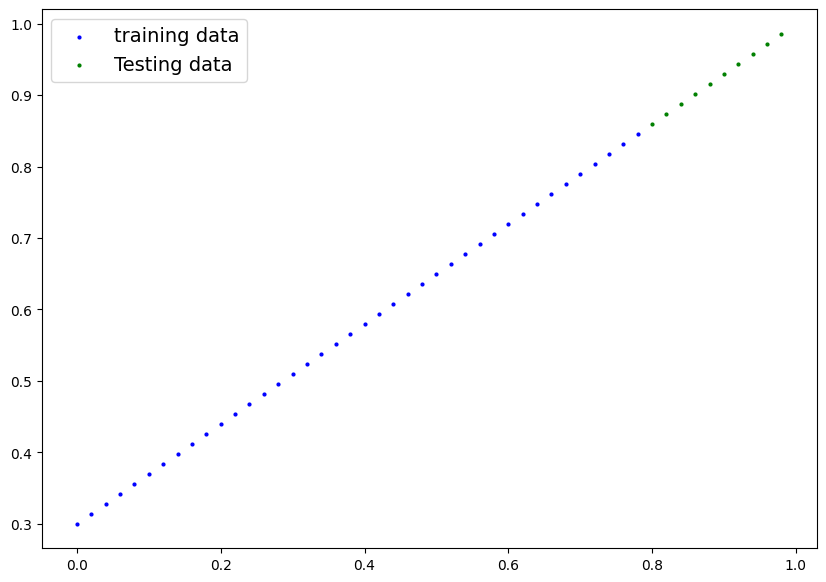

In [36]:
plot_predictions();

#Traing the model

First pytorch model- linear regg model

In [37]:
# Create a Linear Regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

# create random seed for same result everytime - 42

In [38]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
parameters = list(model_0.parameters())
print(parameters)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


### making predictions using torch.inference_mode()
To check our models predictive power lets see how well it predicts X_test and y_test

In [39]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

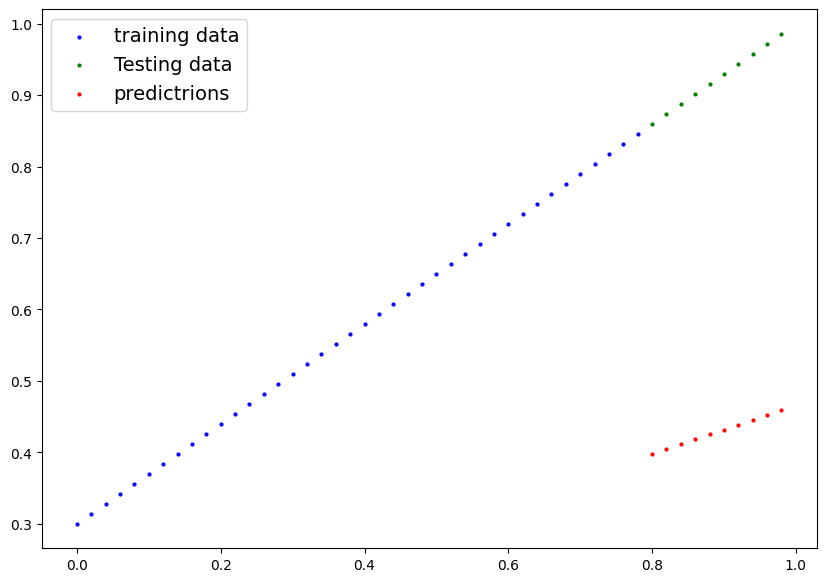

In [40]:
plot_predictions(predictions=y_preds)

###Train a Model

In [41]:
#setup loss function
loss_fn = nn.L1Loss()

In [42]:
#setup an optimizer
#Implements stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

##Things we need to do in traing loop
0. Loop through the data
1. forward pass (this involves forward()) to make predictions on data
2. calculate the loss(compare forward pass to ground truth lables)
3. optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of the
   parameters of our model with respect to the loss (**backpropagation**)
5. optimizer step- use the optimizer to adjust our models parameters to try and
   improve loss(**gradient descent**)


In [43]:
# an epoch is one loop through the data
torch.manual_seed(42)
epochs = 2500
#traking progress
epoch_count=[]
loss_values = []
test_loss_values=[]
##Training
# 0.Loop through the data
for epoch in range(epochs):
  #set the model to traing mode
  model_0.train()
  #forward pass
  y_pred = model_0(X_train)
  #Calculate the loss
  loss = loss_fn(y_pred,y_train)
  #print(f"Loss:{loss}")
  #optimizer zero grad
  optimizer.zero_grad()
  #perform backpropagation
  loss.backward()
  #step the optimizer(perform gradient descent)
  optimizer.step()
  #turn off gradient tracking and testing
  model_0.eval()
  with torch.inference_mode():
    #1.forward pass
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch:{epoch} | Loss: {loss} | Test Loss:{test_loss}")
      print(model_0.state_dict())

Epoch:0 | Loss: 0.31288138031959534 | Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:100 | Loss: 0.024458957836031914 | Test Loss:0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch:200 | Loss: 0.008932482451200485 | Test Loss:0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:300 | Loss: 0.008932482451200485 | Test Loss:0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:400 | Loss: 0.008932482451200485 | Test Loss:0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:500 | Loss: 0.008932482451200485 | Test Loss:0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:600 | Loss: 0.008932482451200485 | Test Loss:0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.

In [44]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

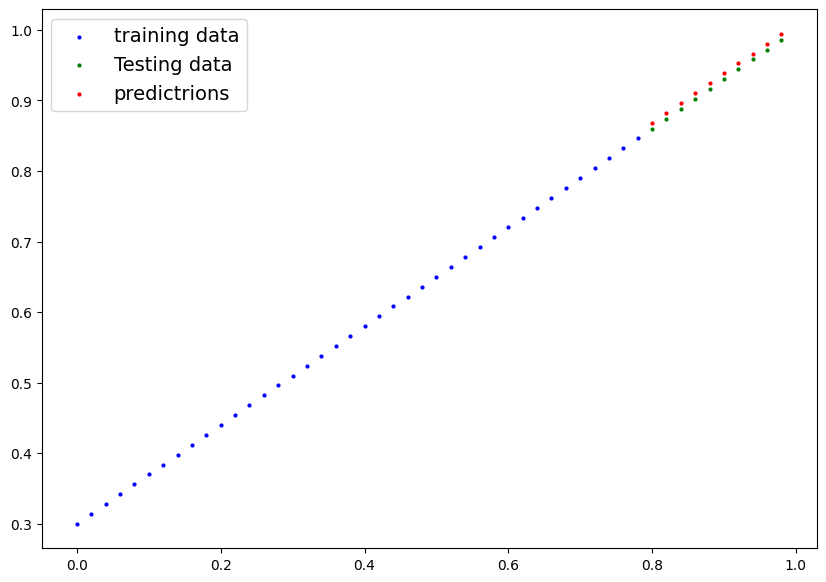

In [45]:
plot_predictions(predictions=y_preds_new)

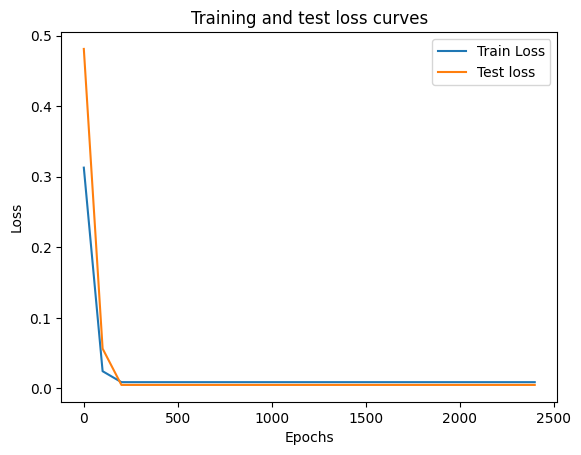

In [46]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "Train Loss")
plt.plot(epoch_count,test_loss_values,label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

#writing code to save a pytorch model

##there are three main methods
1.torch.save() -- python pickle
2.torch.load() -- allows to load a pytorch object
3.torch.nn.Module.load_state_dict() -- allows to load a models saved dictionary

In [47]:
#saving our Pytorch model
from pathlib import Path
#1. create a model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#create a model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH
#same the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [48]:
!ls -1 models

01_pytorch_workflow_model_0.pth


#code to load a pytorch model

In [49]:
#since we saved our model
# to load in a saved dict we have to initiate a new instance of our model class
loaded_model_0=LinearRegressionModel()
loaded_model_0.state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1879: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [50]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [51]:
#make some model preds
# model_0.eval()
# with torch.inference_mode():
#   y_preds = model_0(X_test)
# y_preds

In [52]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])